This file shows how to define and plot single or binary lens and point
source models. The binary lens model has a planetary mass ratio and
one can clearly see that the planetary anomaly is a short perturbation
on top of smooth single point lens light curve. Also the lens source
geometry (i.e., the source trajectory and the caustic position are
plotted).

In [1]:
import matplotlib.pyplot as plt
import MulensModel as mm

In [2]:
# Defines source star and lens star as point sources

# Create a PSPL model
t_0 = 3583.
u_0 = 0.3
t_E = 12.

pspl = mm.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E})

In [3]:
# adds a planet to the lens star

# Create a planet model with same PSPL parameters
s = 1.5
q = 0.001
alpha = 339.0
rho = 0.001

planet = mm.Model(
    {'t_0': t_0, 'u_0': u_0, 't_E': t_E, 's': s, 'q': q, 'alpha': alpha,
     'rho': rho})
planet.set_magnification_methods([3589., 'VBBL', 3595.])

Text(0.5, 1.0, 'A Point Lens Model')

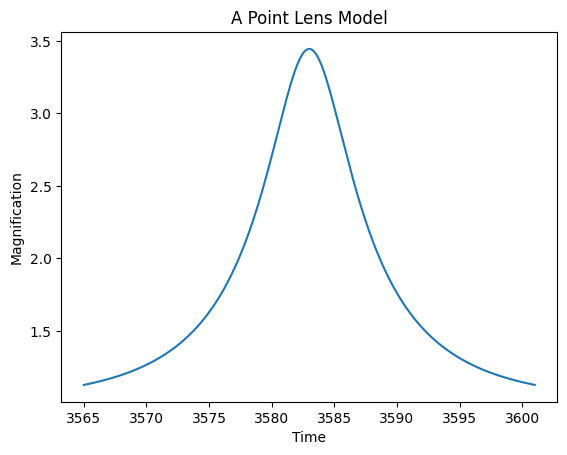

In [4]:
# MAGNIFICATION PLOT - just source and lens star 

# F1: Plot PSPL model
plt.figure()
pspl.plot_magnification()
plt.title('A Point Lens Model')

Text(0.5, 1.0, 'A Point Lens Model in Magnitudes')

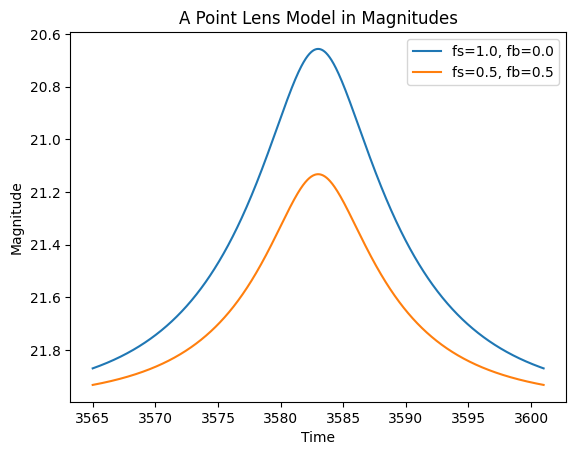

In [5]:
# MAGNITUDE PLOT

# F2: Plot PSPL model in magnitudes with arbitrary blending
plt.figure()
pspl.plot_lc(source_flux=1.0, blend_flux=0.0, label='fs=1.0, fb=0.0')
pspl.plot_lc(source_flux=0.5, blend_flux=0.5, label='fs=0.5, fb=0.5')
plt.legend(loc='best')
plt.title('A Point Lens Model in Magnitudes')

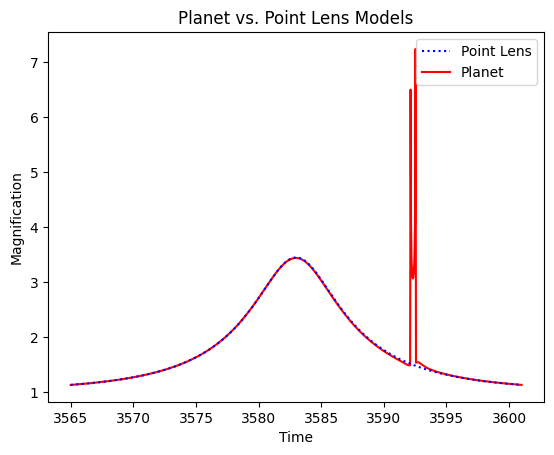

In [6]:
# MAGNIFICATION PLOT - added planet to lens star

# F3: Plot planet and PSPL models
plt.figure()
pspl.plot_magnification(
    color='blue', linestyle=':', zorder=2, label='Point Lens')
planet.plot_magnification(
    color='red', linestyle='-', zorder=1, label='Planet')
plt.title('Planet vs. Point Lens Models')
plt.legend(loc='best')

Text(0.5, 1.0, 'Planetary Perturbation Detail')

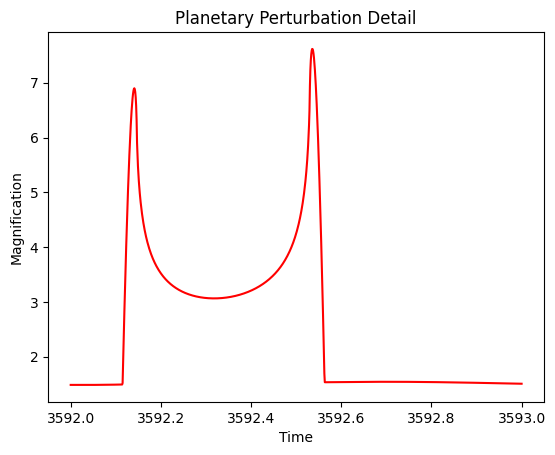

In [7]:
# MAGNIFICATION PLOT - zoomed into planet deviation

# F4: Plot detail of the planet perturbation
plt.figure()
planet.plot_magnification(
    t_range=[3592, 3593], color='red', linestyle='-', zorder=2, label='Planet')
plt.title('Planetary Perturbation Detail')

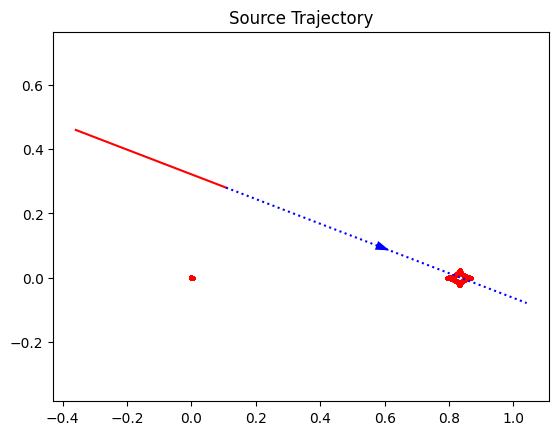

In [11]:
# F5: Plot source trajectory and caustic
plt.figure()
#defining a planet accounts for both the lens star and the planet around it
planet.plot_trajectory(t_range=[t_0 - t_E / 2., t_0], color='red',
                       caustics=True, arrow=False) # plotting caustics is built into trajectory function
planet.plot_trajectory(t_range=[t_0, t_0 + t_E], linestyle=':', color='blue')
plt.axis('equal')
plt.title('Source Trajectory')

plt.show()